This notebook illustrates using the Physical Optics Propagation in PYthon module to simulate the visible nulling coronagraph of the Planet Imaging Concept Testbed using a Rocket Experiment.


# Simulate a Lateral Shearing Interferometer


From Euler's identity: $e^{i\pi}+1=0$

The summation of two waves with a $\pi$ phase shift is equivalent to taking the difference of the complex waves without the $\pi$:
$A_1e^{i\phi_1}+A_2e^{i(\phi_2+\pi)}=A_1e^{i\phi_1}+A_2e^{\phi_2+i\pi}=A_1e^{i\phi_1}+A_2e^{\phi_2}e^{+i\pi}=A_1e^{i\phi_1}-A_2e^{i\phi_2}$


In [1]:
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import poppy 

defocus_coefficient = 1.0 * 6e-9 / (2 * np.sqrt(3))
coefficients_sequence = [0, 0, 0, defocus_coefficient]
thinlens = poppy.ZernikeWFE(radius=.5, coefficients=coefficients_sequence)
detector = poppy.Detector(pixelscale=.05,fov_arcsec=10)
aperture = poppy.optics.CircularAperture(radius=.25)


/home/douglase/miniconda/envs/default/lib/python2.7/site-packages/pysynphot-0.9.8.2.dev0-py2.7-linux-x86_64.egg/pysynphot/locations.py:44: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/home/douglase/miniconda/envs/default/lib/python2.7/site-packages/pysynphot-0.9.8.2.dev0-py2.7-linux-x86_64.egg/pysynphot/locations.py:119: UserWarning: Extinction files should be moved to $PYSYN_CDBS/extinction for compatibility with future versions of pysynphot.
  warnings.warn('Extinction files should be moved to '
/home/douglase/miniconda/envs/default/lib/python2.7/site-packages/pysynphot-0.9.8.2.dev0-py2.7-linux-x86_64.egg/pysynphot/locations.py:155: UserWarning: Extinction files not found in grid/extinction
  warnings.warn('Extinction files not found in %s' % (extdir,))
/home/douglase/miniconda/envs/default/lib/python2.7/site-packages/pysynphot-0.9.8.2.dev0-py2.7-linux-x86_64.egg/pysynphot/lo

# Find PSF of a 0.5 telescope

Including a slight focus error.

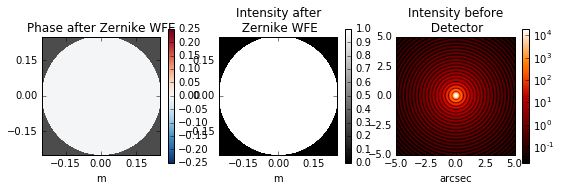

In [2]:
wf_fraunhofer = poppy.Wavefront(diam=0.5, wavelength=675e-9,npix=1024,oversample=4)
wf_fraunhofer *= aperture
wf_fraunhofer *= thinlens
plt.figure(figsize=(9,3))
ax1=plt.subplot(131)
wf_fraunhofer.display(what='phase',colorbar=True,ax=ax1)
ax2=plt.subplot(132)
wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax2)
wf_fraunhofer.propagateTo(detector)
ax3=plt.subplot(133)
wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax3)





# Add a Lateral Shearing Interferometer

In [3]:
from poppy_nulling import lsi

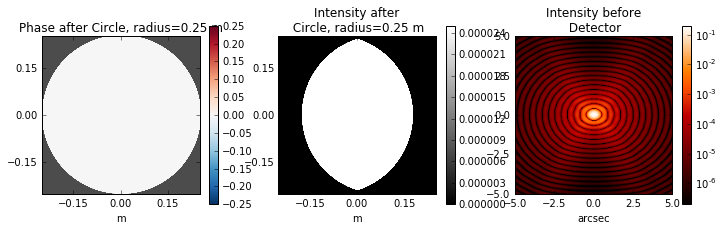

In [4]:
reload(lsi)
wf_fraunhofer = poppy.Wavefront(diam=0.5, wavelength=675e-9,npix=1024,oversample=4)
wf_fraunhofer *= aperture
plt.figure(figsize=(12,4))
ax1=plt.subplot(131)
wf_fraunhofer.display(what='phase',colorbar=True,ax=ax1)
lsi.shearing_nuller(wf_fraunhofer, shear=.15*u.m,bright=False,shear_axis='x',
                    one_arm_error=.99) #add a 1% reflectivity mismatch to one arm
lsi.mask_noninterference(wf_fraunhofer, aperture,shear=0.15*u.m,shear_axis='x')

ax2=plt.subplot(132)
wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax2)
wf_fraunhofer.propagateTo(detector)
ax3=plt.subplot(133)
wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax3)
#plt.tight_layout()

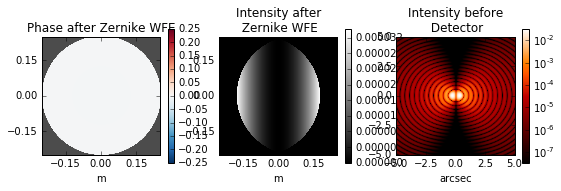

In [5]:
wf_fraunhofer = poppy.Wavefront(diam=0.5, wavelength=675e-9,npix=1024,oversample=4)
wf_fraunhofer *= aperture
wf_fraunhofer *= thinlens #add a slight focus error.
plt.figure(figsize=(9,3))
ax1=plt.subplot(131)
wf_fraunhofer.display(what='phase',colorbar=True,ax=ax1)
lsi.shearing_nuller(wf_fraunhofer, shear=.15*u.m,bright=False,shear_axis='x',)
lsi.mask_noninterference(wf_fraunhofer, aperture,shear=0.15*u.m,shear_axis='x')

ax2=plt.subplot(132)
wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax2)
wf_fraunhofer.propagateTo(detector)
ax3=plt.subplot(133)
wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax3)
dark_psf=wf_fraunhofer.copy()

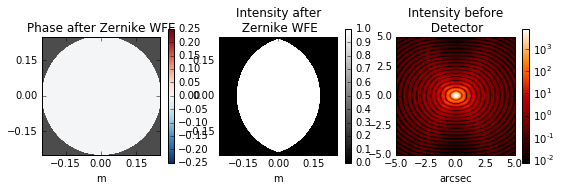

In [6]:
wf_fraunhofer = poppy.Wavefront(diam=0.5, wavelength=675e-9,npix=1024,oversample=4)
wf_fraunhofer *= aperture
wf_fraunhofer *= thinlens

plt.figure(figsize=(9,3))
ax1=plt.subplot(131)
wf_fraunhofer.display(what='phase',colorbar=True,ax=ax1)

lsi.shearing_nuller(wf_fraunhofer, shear=.15*u.m,bright=True,shear_axis='x')
lsi.mask_noninterference(wf_fraunhofer, aperture,shear=0.15*u.m,shear_axis='x')

ax2=plt.subplot(132)
wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax2)
wf_fraunhofer.propagateTo(detector)
ax3=plt.subplot(133)
wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax3)
bright_psf=wf_fraunhofer.copy()

# Demonstrate transmission of tilted wavefronts


The transmission pattern repeats with a frequency of $\frac{\lambda}{2 b}$ where $b$ is the shear or  baseline.

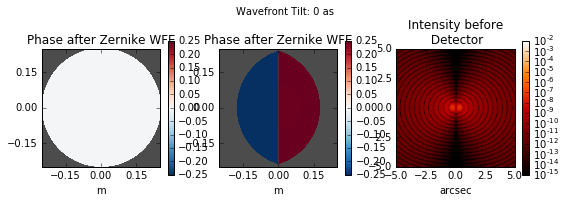

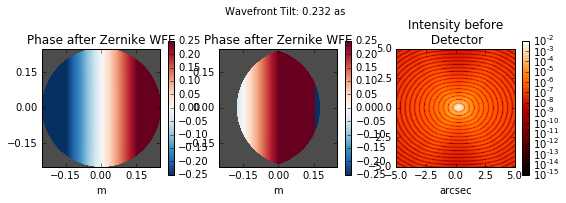

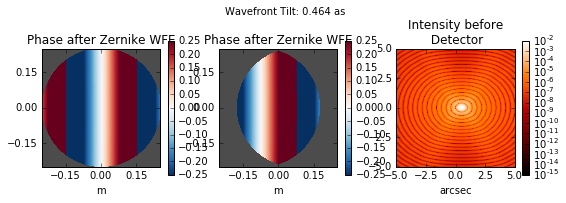

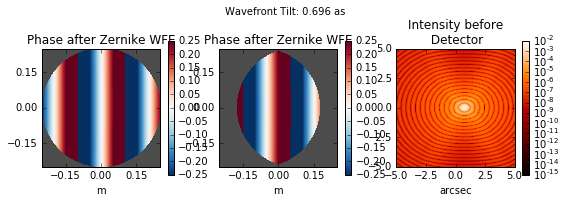

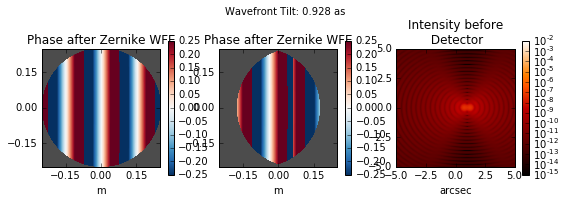

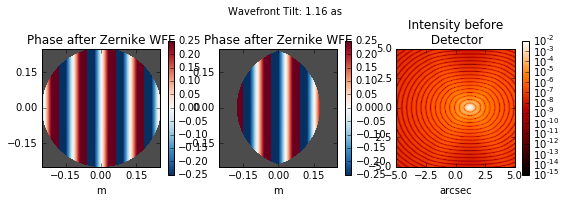

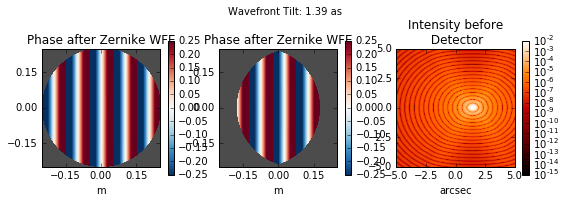

In [7]:
period=(wf_fraunhofer.wavelength/(0.15) *u.radian).to(u.arcsec)

for tilt in np.arange(0,1.5,period.value/4.0):
    wf_fraunhofer = poppy.Wavefront(diam=0.5, wavelength=675e-9,npix=1024,oversample=4)
    wf_fraunhofer *= aperture
    wf_fraunhofer.normalize()
    #if tilt >0:
    wf_fraunhofer.tilt(Xangle=tilt)
    wf_fraunhofer *= thinlens
    plt.figure(figsize=(9,3))
    ax1=plt.subplot(131)
    wf_fraunhofer.display(what='phase',colorbar=True,ax=ax1)
    
    lsi.shearing_nuller(wf_fraunhofer, shear=.15*u.m,bright=False,shear_axis='x')
    lsi.mask_noninterference(wf_fraunhofer, aperture,shear=0.15*u.m,shear_axis='x')

    ax2=plt.subplot(132)
    wf_fraunhofer.display(what='phase',colorbar=True,imagecrop=20,ax=ax2)
    wf_fraunhofer.propagateTo(detector)
    ax3=plt.subplot(133)
    wf_fraunhofer.display(what='intensity',colorbar=True,imagecrop=20,ax=ax3,vmax=0.01,vmin=1e-15)
    plt.suptitle("Wavefront Tilt: %.3g as"%tilt)




## Check that leakage is expected

Make sure that a 1% intensity mismatch between the arms is recovered.

In [10]:
#example coverage test:
import astropy.units as u
import numpy as np
import poppy 

detector = poppy.Detector(pixelscale=.05,fov_arcsec=10)
aperture = poppy.optics.CircularAperture(radius=.25)
from poppy_nulling import lsi

#measure contrast
wf_fraunhofer = poppy.Wavefront(diam=0.5, wavelength=675e-9,npix=1024,oversample=4)
wf_fraunhofer *= aperture
lsi.shearing_nuller(wf_fraunhofer, shear=.15*u.m,bright=False,shear_axis='x',
                    one_arm_error=.99**0.5) #add a 1% reflectivity mismatch to one arm
lsi.mask_noninterference(wf_fraunhofer, aperture,shear=0.15*u.m,shear_axis='x')

wf_fraunhofer.propagateTo(detector)
dark_psf=wf_fraunhofer.copy()
wf_fraunhofer = poppy.Wavefront(diam=0.5, wavelength=675e-9,npix=1024,oversample=4)
wf_fraunhofer *= aperture
lsi.shearing_nuller(wf_fraunhofer, shear=.15*u.m,bright=True,shear_axis='x',
                    one_arm_error=.99**0.5) #add a 1% intensity mismatch to one arm
lsi.mask_noninterference(wf_fraunhofer, aperture,shear=0.15*u.m,shear_axis='x')
wf_fraunhofer.propagateTo(detector)
bright_psf=wf_fraunhofer.copy()
lsi_null_depth=dark_psf.intensity.sum()/bright_psf.intensity.sum()
print("Simulation null depth: %.4e"%lsi_null_depth)

#Check against Analytic Values

e=-0.01
#fractional deviation from input beam ***intensity*** 
#whereas the scalar arm mismatch above is multiplied by the wavefront amplitude
I_1=1
I_2=1+e
dI = (I_1-I_2)/((I_1+I_2))
N_serabyn=(dI)**2/4. #eq (4) Serabyn 2000, Proc SPIE. 
print("First Order Null Depth: %.4e"%N_serabyn)

N=(2.+e-2.0*(1.+e)**0.5)/(2.+e+2.0*(1.+e)**0.5) #eq. B.7 of Douglas 2016, PhD thesis.
print("More Precise Null depth: %.4e"%N)

assert np.round(lsi_null_depth,decimals=15) == np.round(N,decimals=15)


Simulation null depth: 6.3131e-06
First Order Null Depth: 6.3130e-06
More Precise Null depth: 6.3131e-06
